In [8]:
import ROOT as rt

In [9]:
TRIG_PT_LOW = 4
TRIG_PT_HIGH = 8
ASSOC_PT_LOW = 2
ASSOC_PT_HIGH = 4

In [10]:
c = rt.TCanvas("main_canvas", "Main Canvas", 0, 10, 1920, 1080)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: main_canvas


In [11]:
def make_mixed_corrections(same_dist, mixed_dist, mass_low=1.11, mass_high=1.12, is_hh=False):
    if is_hh:
        same3d = same
        same3d.Sumw2()
        mixed3d = mixed
        mixed3d.Sumw2()
    else:
        same.GetAxis(2).SetRangeUser(mass_low, mass_high)
        mixed.GetAxis(2).SetRangeUser(mass_low, mass_high)
        same3d = same.Projection(0, 1, 3)
        same3d.Sumw2()
        mixed3d = mixed.Projection(0, 1, 3)
        mixed3d.Sumw2()
        
    for zbin in range(10):
        same3d.GetZaxis().SetRange(zbin+1, zbin+1)
        same2d = same3d.Project3D("xye")
        same2d.SetName(f"same2dproj_zbin_{zbin}")

        mixed3d.GetZaxis().SetRange(zbin+1, zbin+1)
        mixed2d = mixed3d.Project3D("xye")
        mixed2d.SetName(f"mix2dproj_zbin_{zbin}")

        #scaling by average of bins adjacent to 0
        scale = 0.5*(mixed2d.Integral(mixed2d.GetXaxis().FindBin(-0.01),    #xmin
                                      mixed2d.GetXaxis().FindBin(0.01),     #xmax 
                                      mixed2d.GetYaxis().FindBin(0.0),      #ymin
                                      mixed2d.GetYaxis().FindBin(0.0)))     #ymax
        same2d.Divide(mixed2d)
        same2d.Scale(scale)
        
        if zbin == 0:
            same2d_total = same2d.Clone("2dproj_total")
        else:
            same2d_total.Add(same2d)

    return same2d_total
    

# 0-20 setup

In [ ]:
input_file_cent_0_20 = rt.TFile("../online/output/cent_0_20.root")

# 20 - 50 setup

In [21]:
input_file_20_50 = rt.TFile("../online/output/cent_20_50-1.root")
input_list_20_50 = input_file_20_50.Get("h-lambda")
input_file_20_50.Close()

In [22]:
trig_dist_20_50 = input_list_20_50.FindObject("fTriggerDist")
lambda_dist_20_50 = input_list_20_50.FindObject("fTriggeredLambdaDist")

In [23]:
h_h_20_50 = input_list_20_50.FindObject("fDphiHHEff")
h_h_mixed_20_50 = input_list_20_50.FindObject("fDphiHHMixed")

In [24]:
h_lambda_20_50 = input_list_20_50.FindObject("fDphiHLambdaEff")
h_lambda_ls_20_50 = input_list_20_50.FindObject("fDphiHLambdaLS")
h_lambda_mixed_20_50 = input_list_20_50.FindObject("fDphiHLambdaMixed")
h_lambda_ls_mixed_20_50 = input_list_20_50.FindObject("fDphiHLambdaLSMixed")

In [29]:
# Setting the trigger Pt (this is never changed again)
trig_dist_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_h_mixed_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_ls_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_mixed_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)
h_lambda_ls_mixed_20_50.GetAxis(0).SetRangeUser(TRIG_PT_LOW, TRIG_PT_HIGH)

In [30]:
# Setting the associated Pt (this is never changed again)
lambda_dist_20_50.GetAxis(0).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_h_mixed_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_ls_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_mixed_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)
h_lambda_ls_mixed_20_50.GetAxis(1).SetRangeUser(ASSOC_PT_LOW, ASSOC_PT_HIGH)

Warning in <TROOT::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_0 (Potential memory leak).


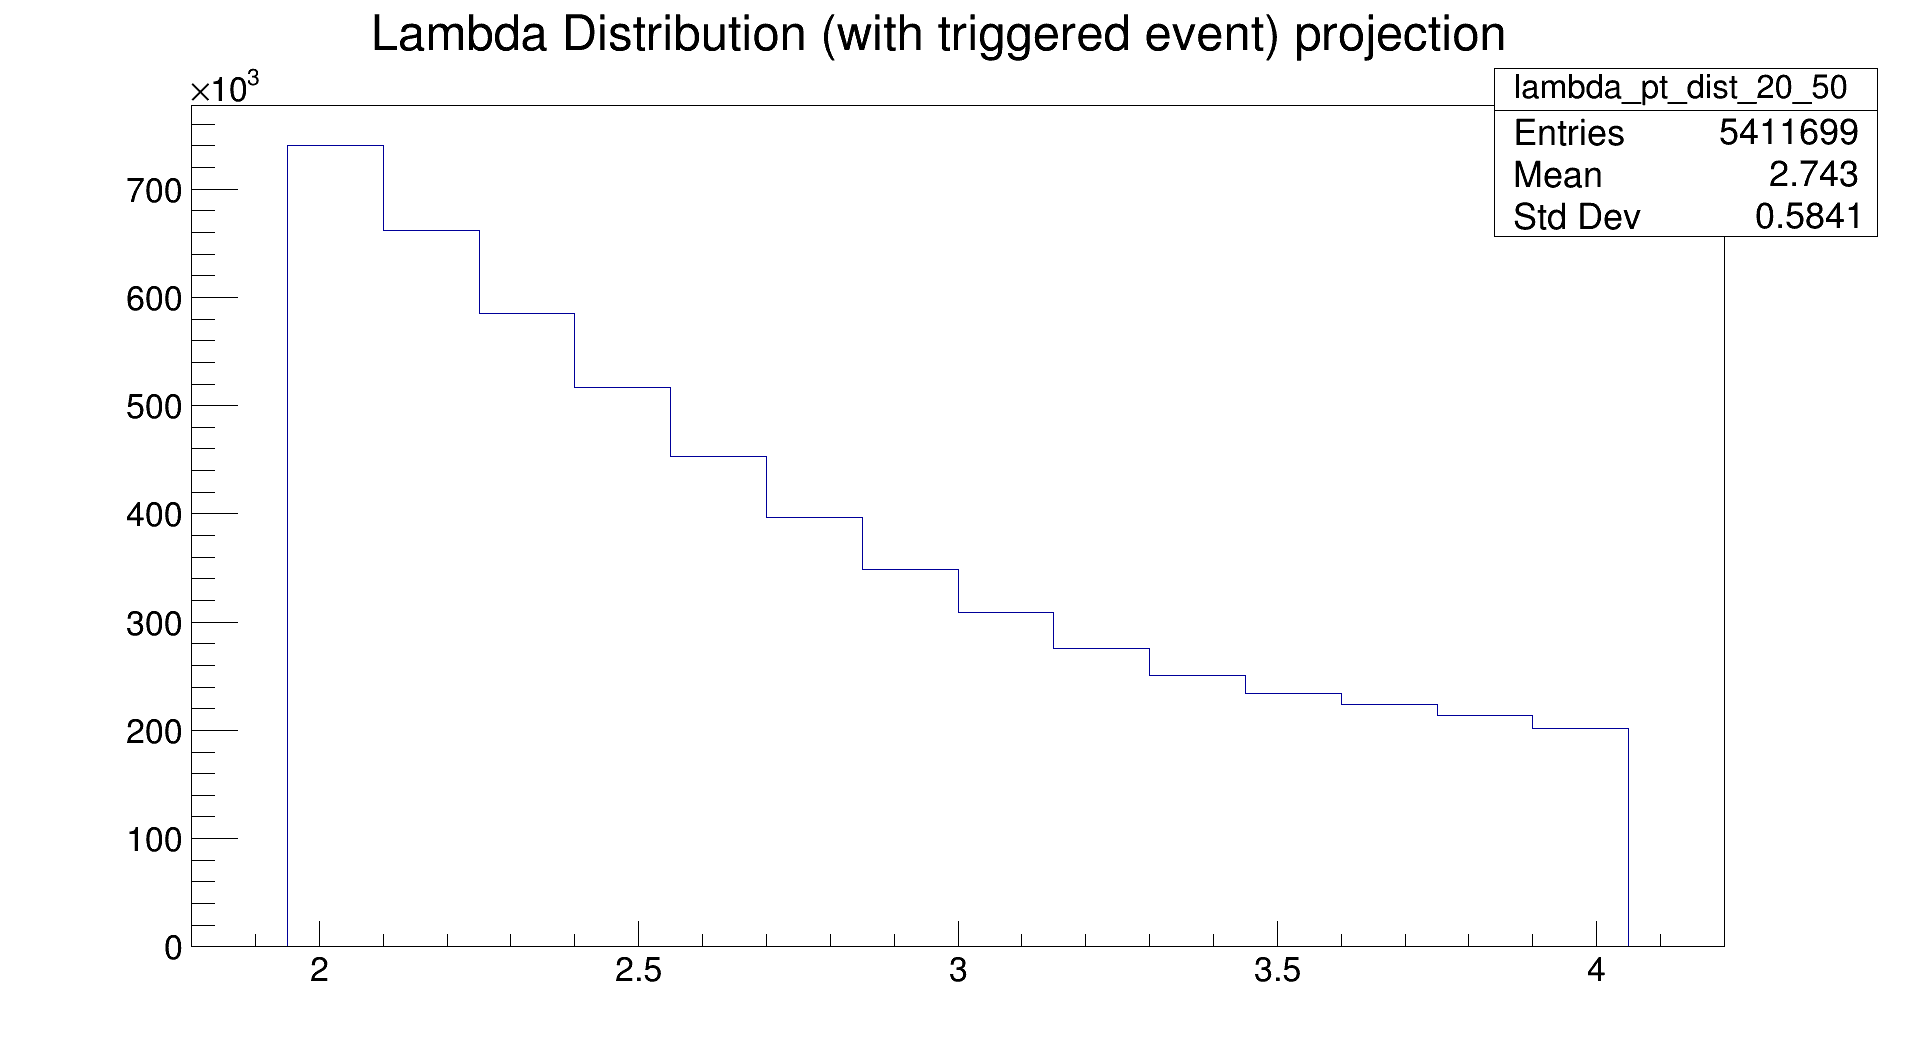

In [31]:
lambda_pt_dist_20_50 = lambda_dist_20_50.Projection(0).Clone("lambda_pt_dist_20_50")

lambda_pt_dist_20_50.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_0 (Potential memory leak).


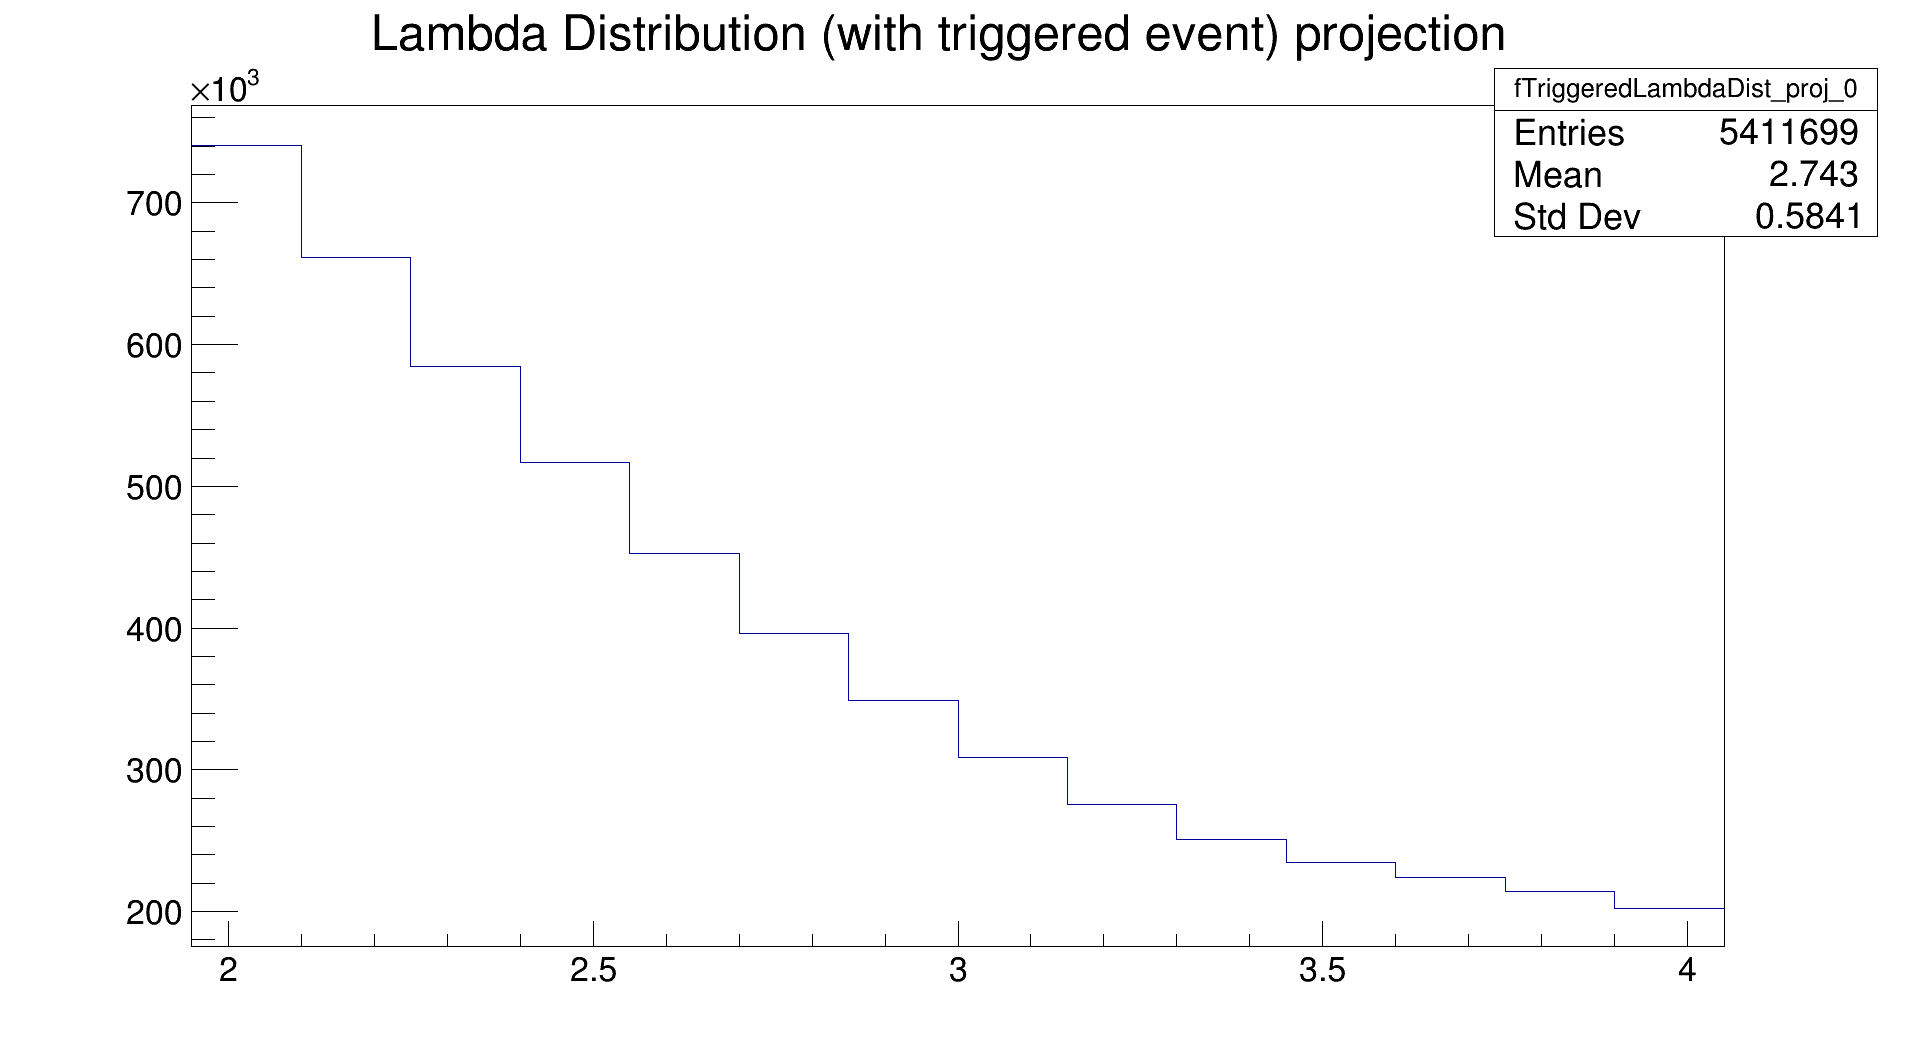

In [32]:
lambda_dist_20_50.Projection(0).Draw()
c.Draw()

# 50 - 80 setup

In [ ]:
input_file_cent_50_80 = rt.TFile("../online/output/cent_50_80.root")